<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 3</b></div>
</span> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import feather

data = pd.read_feather('./data/BIG_MART_SALES_PREDICTION.feather')
data.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6250,FDA02,14.0,Regular,0.029698,Dairy,143.0786,OUT013,1987,High,Tier 3,Supermarket Type1,3178.5292
3460,DRC27,13.8,Low Fat,0.058431,Dairy,243.6802,OUT017,2007,None,Tier 2,Supermarket Type1,1965.4416
684,FDJ08,11.1,Low Fat,0.110844,Fruits and Vegetables,189.2846,OUT049,1999,Medium,Tier 1,Supermarket Type1,5159.2842


In [2]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Preprocesamiento

### 1. Considere las columnas con datos faltantes, muestre y almacene en disco duro un diagrama de barras que el numero de datos faltantes para esas columnas.

In [3]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

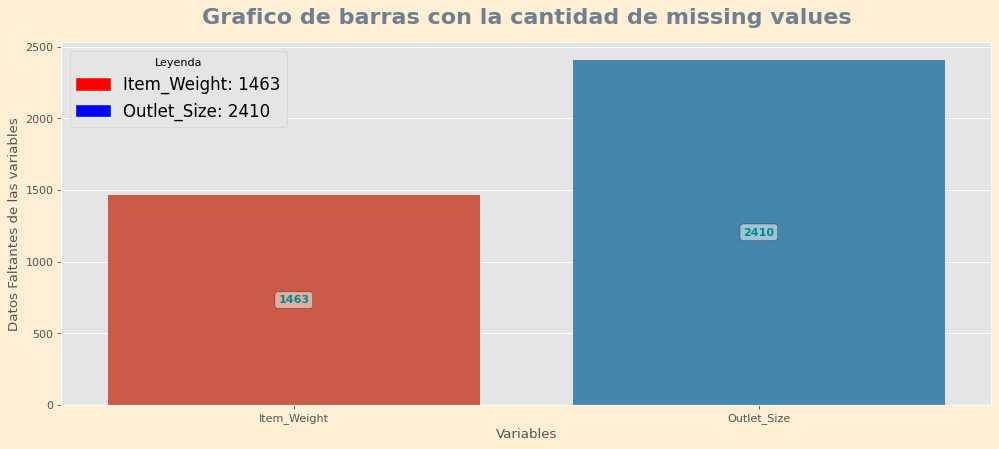

In [4]:
import colorsys
import matplotlib.patches as mpatches

data_variables_with_missing_values = data[['Item_Weight', 'Outlet_Size']]

fig = plt.figure(figsize=(15,6), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.barplot(
    x=data_variables_with_missing_values.isnull().sum().index, 
    y=data_variables_with_missing_values.isnull().sum().values,
    dodge=False
    )
plt.title('Grafico de barras con la cantidad de missing values', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Variables')
plt.ylabel('Datos Faltantes de las variables')
plt.xticks(rotation=0)
for p in ax.patches:
   ax.annotate(
      text='{:.0f}'.format(p.get_height()), 
      xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2),  
      ha='center', va='center',
      rotation=0, color='darkcyan', 
      fontweight='bold',
      bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.5))

item_weight = mpatches.Patch(color='red', label='Item_Weight')
outlet_size = mpatches.Patch(color='blue', label='Outlet_Size')

plt.legend(
    labels=[
        f'Item_Weight: {data_variables_with_missing_values.isnull().sum().values[0]}', 
        f'Outlet_Size: {data_variables_with_missing_values.isnull().sum().values[1]}'],
    loc='upper left', 
    fontsize=15, 
    frameon=True, 
    title='Leyenda', 
    handles=[ item_weight, outlet_size])
      

# save figure
plt.savefig('./imgs/Columnas_con_datos_faltantes_de_la_data_BIG_MART_SALES_PREDICTION.png',
                bbox_inches='tight', dpi=300)
plt.show()


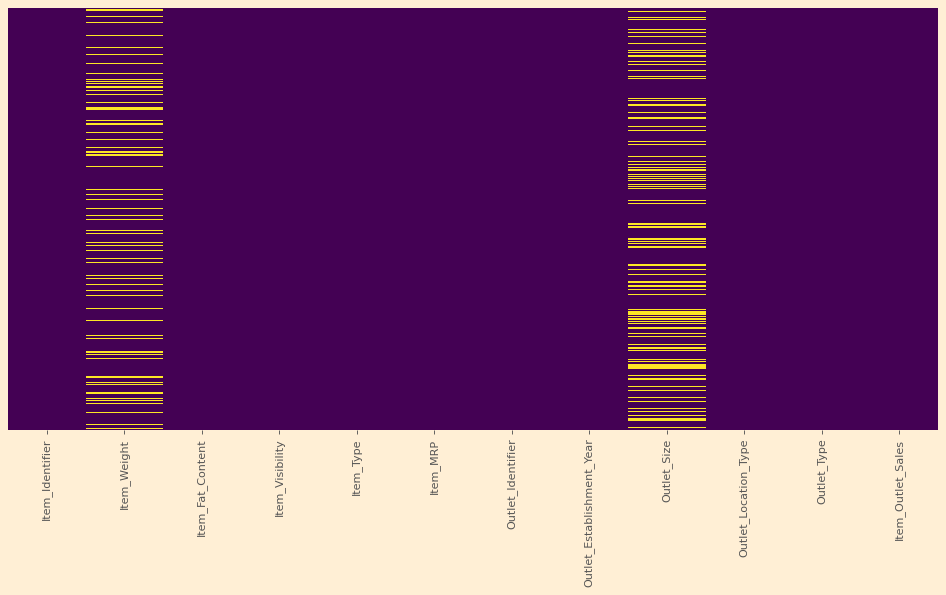

In [5]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### 2. A partir del contenido de las columnas, separe estas en columnas con datos categóricos (nombre del dataframe : BM_cat) y columnas con datos numéricos (BM_Cuan). Para cada uno de estos dataframes realice una imputación adecuada para los valores faltantes.

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# BM_cat = data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
BM_cat = data.select_dtypes(include=[object])
BM_cat.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [8]:
# BM_cuan = data[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]
BM_cuan = data.select_dtypes(include=[np.number])
BM_cuan.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


#### Imputation

In [9]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
BM_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [12]:
# make imputation for categorical variables for outlet_Size column
BM_cat['Outlet_Size'] = BM_cat['Outlet_Size'].fillna(BM_cat['Outlet_Size'].mode()[0])
BM_cat['Outlet_Size'].isnull().sum()

0

In [13]:
BM_cuan.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data.pivot_table(values='Item_Weight', index='Item_Identifier')

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [15]:
# make imputation for numerical varible Item_Weight column
BM_cuan['Item_Weight'] = BM_cuan['Item_Weight'].fillna(BM_cuan['Item_Weight'].mean())
BM_cuan['Item_Weight'].isnull().sum()

0

### 3. Muestre un histograma de la columna Item_Outlet_Sales para cada nivel de la variable Outlet_type ('Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3')

In [16]:
# create edges for Item_Outlet_Sales column
bins = np.histogram_bin_edges(data['Item_Outlet_Sales'] , bins='sturges', range=(data['Item_Outlet_Sales'].min(), data['Item_Outlet_Sales'].max()))
bins

array([   33.29      ,   903.53498667,  1773.77997333,  2644.02496   ,
        3514.26994667,  4384.51493333,  5254.75992   ,  6125.00490667,
        6995.24989333,  7865.49488   ,  8735.73986667,  9605.98485333,
       10476.22984   , 11346.47482667, 12216.71981333, 13086.9648    ])

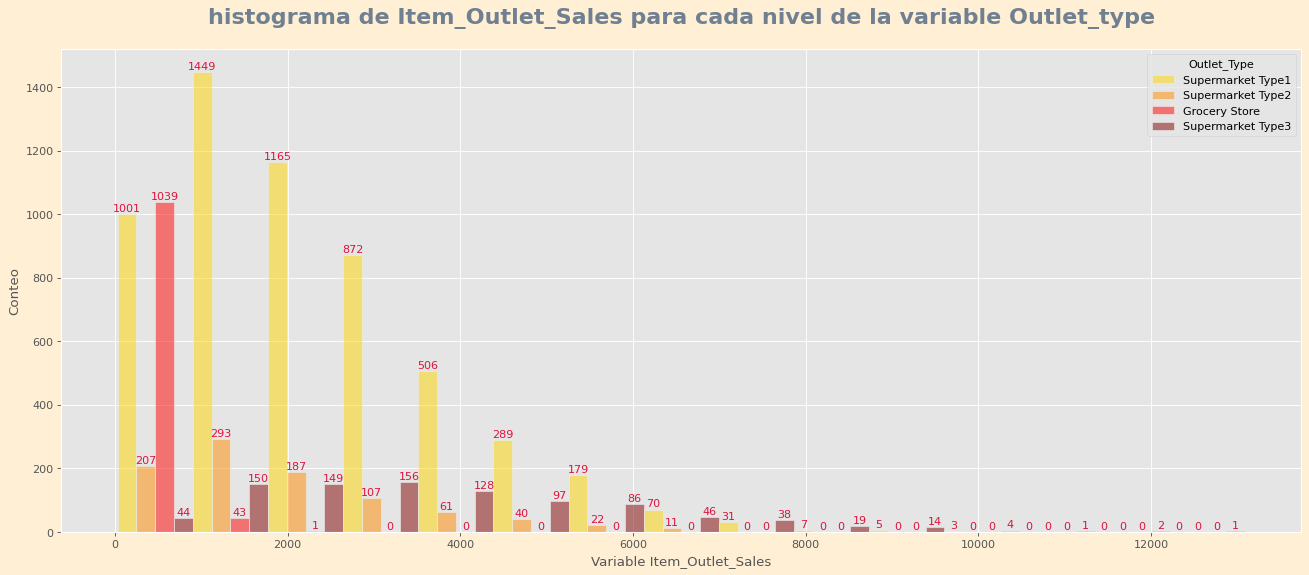

In [17]:
fig = plt.figure(figsize=(20,8), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.histplot(
    x ='Item_Outlet_Sales', 
    data = data, 
    hue='Outlet_Type',
    bins=bins, 
    color='#FFD700', 
    alpha=0.5, 
    legend=True,
    kde=False, multiple="dodge", fill=True,
    palette=['#FFD700', '#FF8C00', '#FF0000', '#800000']
    )
plt.title('histograma de Item_Outlet_Sales para cada nivel de la variable Outlet_type', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Variable Item_Outlet_Sales')
plt.ylabel('Conteo')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}\n',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', color='crimson')

plt.show()

In [18]:
frecuency = data['Item_Outlet_Sales'].value_counts(bins=bins).to_frame( name='Frecuencia')
frecuency

,Frecuencia
"(33.289, 903.535]",2291
"(903.535, 1773.78]",1935
"(1773.78, 2644.025]",1502
"(2644.025, 3514.27]",1135
"(3514.27, 4384.515]",695
"(4384.515, 5254.76]",426
"(5254.76, 6125.005]",287
"(6125.005, 6995.25]",127
"(6995.25, 7865.495]",69
"(7865.495, 8735.74]",26


## Modelamiento 
* Considere que la variable objetivo es  Item_Outlet_Sales

### 1. Construya modelos de regresión: Sin hacer grid search

In [19]:
df_aux = data.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for i in BM_cat.columns:
    BM_cat[i] = lr.fit_transform(BM_cat[i])

In [21]:
X = pd.concat([BM_cat, BM_cuan], axis=1).drop(['Item_Outlet_Sales'], axis=1)
y = BM_cuan['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    train_size=0.7,
    random_state=2022)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
# calculate score from linear regresion
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5010640714582305

In [25]:
# calculate score from linear regresion
lr.score(X_train, y_train)*100

51.396519458043166

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores

array([-1438731.15107836, -1450722.29393965, -1376593.13843159,
       -1543735.15413043, -1232140.16358192, -1404483.22890167,
       -1555515.00733597, -1537699.46789391, -1378905.60603147,
       -1199276.06418855])

In [27]:
cv_score = np.sqrt(np.abs(scores))
cv_score

array([1199.47119644, 1204.45933677, 1173.28305981, 1242.47138966,
       1110.01809156, 1185.10895233, 1247.20287337, 1240.04010737,
       1174.26811505, 1095.11463518])

In [28]:
from sklearn.metrics import mean_squared_error
# calculate mean squared error (Error Cuadratico Medio)
rme  = np.sqrt(mean_squared_error(y_test, y_pred))
rme

1215.929185834298

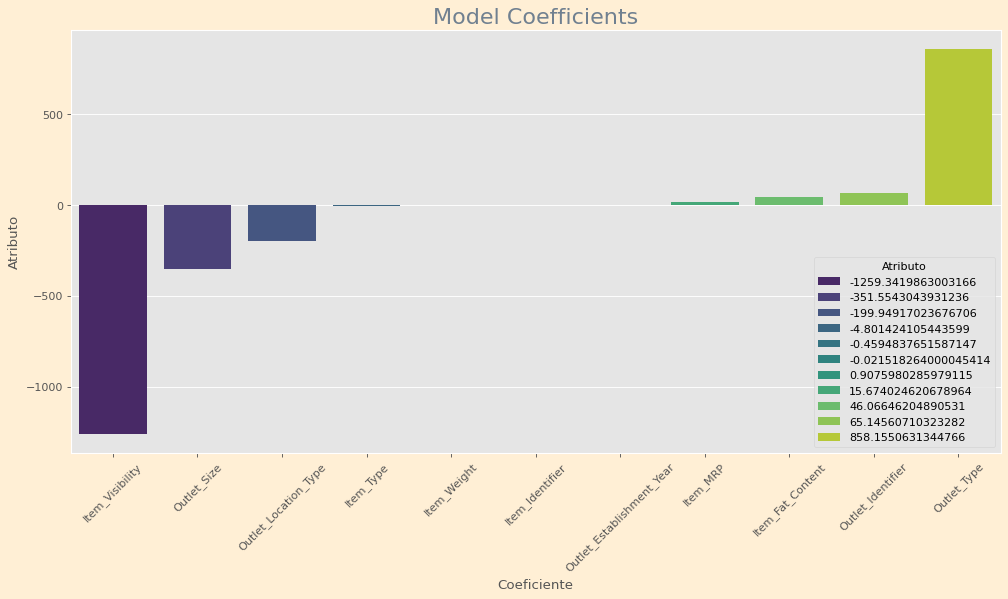

In [29]:
coef = pd.DataFrame({
    'Atributo':lr.coef_,
    'Coeficiente':X.columns
}).sort_values(by='Atributo', ascending=True)

fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)

sns.barplot(x='Coeficiente', y='Atributo', hue= 'Atributo', data=coef, dodge=False, palette='viridis')
# coef1.plot(kind='bar', title='Model Coefficients')
plt.title('Model Coefficients', fontsize=20, color="slategrey")
plt.xticks(rotation=45)
plt.show()

### 2. bosque aleatorio : Usando grid search. Usted plantee el espacio de hiperparametros.

In [30]:
df_aux = data.copy()

In [31]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for i in BM_cat.columns:
    BM_cat[i] = lr.fit_transform(BM_cat[i])

In [32]:
X = pd.concat([BM_cat, BM_cuan], axis=1).drop(['Item_Outlet_Sales'], axis=1)
y = BM_cuan['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    train_size=0.7,
    random_state=2022)

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=6, 
    min_samples_leaf=50,
    n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [34]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([3640.77074805, 2115.05250335,  579.0054295 , ..., 2565.60977049,
       2834.50516277,  253.70667527])

In [35]:
regressor.score(X_train,y_train)*100

61.4520888262786

In [36]:
# calculate score from linear regresion
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5995537702079239

In [37]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
np.sqrt(np.abs(cv_score))

array([1085.69422195, 1092.9255851 , 1095.79814225, 1111.18986331,
        989.71923475, 1077.13394779, 1164.73289384, 1109.31493564,
       1052.99074156, 1003.50287989])

In [38]:
from sklearn.metrics import mean_squared_error
# calculate mean squared error (Error Cuadratico Medio)
rme  = np.sqrt(mean_squared_error(y_test, y_pred))
rme

1089.3263226111237

In [39]:
submission = pd.DataFrame({
'Item_Identifier':X_test['Item_Identifier'],
'Outlet_Identifier':X_test['Outlet_Identifier'],
'Item_Outlet_Sales':y_test,
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Item_Outlet_Sales'])

In [40]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales,Item_Outlet_Sales
4714,225,9,3640.770748,3640.770748
1137,1172,2,2115.052503,2115.052503
2590,1265,3,579.005429,579.005429
7387,1497,4,383.051418,383.051418
1822,1290,8,2115.273951,2115.273951
...,...,...,...,...
7640,183,9,1319.137302,1319.137302
7541,689,8,3740.624567,3740.624567
2382,1153,2,2565.609770,2565.609770
5598,727,6,2834.505163,2834.505163


### 3. Proponga una red neuronal buscando mejorar los indicadores de calidad obtenidos con los dos modelos anteriores.

In [41]:
df_aux = data.copy()

In [42]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for i in BM_cat.columns:
    BM_cat[i] = lr.fit_transform(BM_cat[i])

In [43]:
X = pd.concat([BM_cat, BM_cuan], axis=1).drop(['Item_Outlet_Sales'], axis=1)
y = BM_cuan['Item_Outlet_Sales']

In [44]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.to_numpy().reshape(-1,1))


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    train_size=0.7,
    random_state=2022)

In [46]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

model = Sequential()

#Input Layer
model.add(
    Dense(
        input_dim = 11, #input_dim: numero de variables independientes
        units=128, #units: numero de neuronas de la capa oculta
        activation = 'relu',
        ))

# model.add(
#     Dense(
#         units=128,
#         kernel_initializer='normal',
#         input_shape=(X_train.shape[1]),
#         activation='relu'
#         ))

#Hidden Layers
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))

#Output Layer
model.add(Dense(1,kernel_initializer='normal',activation='linear'))



In [47]:
#compile
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,401
Trainable params: 166,401
Non-trai

In [48]:
#training
model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.2)

Epoch 1/1000
75/75 [==============================] - 2s 12ms/step - loss: 0.5345 - mean_absolute_error: 0.5345 - val_loss: 0.4301 - val_mean_absolute_error: 0.4301
Epoch 2/1000
75/75 [==============================] - 1s 8ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - val_loss: 0.4448 - val_mean_absolute_error: 0.4448
Epoch 3/1000
75/75 [==============================] - 1s 8ms/step - loss: 0.4629 - mean_absolute_error: 0.4629 - val_loss: 0.4419 - val_mean_absolute_error: 0.4419
Epoch 4/1000
75/75 [==============================] - 1s 8ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - val_loss: 0.4283 - val_mean_absolute_error: 0.4283
Epoch 5/1000
75/75 [==============================] - 1s 9ms/step - loss: 0.4541 - mean_absolute_error: 0.4541 - val_loss: 0.4288 - val_mean_absolute_error: 0.4288
Epoch 6/1000
75/75 [==============================] - 1s 8ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - val_loss: 0.4435 - val_mean_absolute_error: 0.4435
Epoch 7/1000
75

In [51]:
# Metrica de precision : accuray
model_accuracy = model.evaluate(X,y)[0]
AUC_model = model.evaluate(X,y)[1]

print("Precision de model :%f" %(model_accuracy*100))
print("AUC de model :%f" %(AUC_model*100))

267/267 [==============================] - 1s 3ms/step - loss: 0.2688 - mean_absolute_error: 0.2688
Precision de model :26.884753
AUC de model :26.884753
